In [ ]:
from google.colab import drive
from imutils import paths

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications import Xception  #transfer leaning
from tensorflow.keras.preprocessing.image import ImageDataGenerator  #generate more images
from tensorflow.keras.layers import AveragePooling2D        #Downsamples the input along its spatial dimensions (height and width)
from tensorflow.keras.layers import Flatten   #Flattening is converting the data into a 1-dimensional array for inputting it to the next layer.
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout   #prevent from overfitting
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer # to label images (1,0) Covid ....... (0,1) Normal
from sklearn.model_selection import train_test_split
print("All Dependencies Are Installed")

All Dependencies Are Installed


In [ ]:
drive.mount('/content/grive')

dataset_train = "/content/grive/MyDrive/Project COVID/train/"
dataset_test = "/content/grive/MyDrive/Project COVID/test/"

Drive already mounted at /content/grive; to attempt to forcibly remount, call drive.mount("/content/grive", force_remount=True).


In [ ]:
INIT_LR = 3e-4     #How Fast or slow model learns(step size) while minimizing loss
EPOCHS = 10         #Number of time model go through all images
BS = 26             #number of training samples(images) to work through before the model’s internal parameters are updated.

In [ ]:
args_train={}
args_train["dataset"]=dataset_train
args_test={}
args_test["dataset"]=dataset_test

In [ ]:
args_test['dataset']

'/content/grive/MyDrive/Project COVID/test/'

In [ ]:
import numpy as np
import cv2
import os
iPaths = list(paths.list_images(args_train["dataset"]))  #image paths
data_train = []
labels_train = []
for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2]   #split the image paths
    image = cv2.imread(iPath)                      #read image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert images into RGB Channel
    image = cv2.resize(image, (224, 224))  #Resizing the images
    data_train.append(image)
    labels_train.append(label)
data_train = np.array(data_train) / 255.0  #255 pixels
labels_train = np.array(labels_train)


In [ ]:
print(data_train , labels_train)

[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.89411765 0.89411765 0.89411765]
   [0.85098039 0.85098039 0.85098039]
   [0.84705882 0.84705882 0.84705882]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.85882353 0.85882353 0.85882353]
   [0.84705882 0.84705882 0.84705882]
   [0.85490196 0.85490196 0.85490196]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.83529412 0.83529412 0.83529412]
   [0.85098039 0.85098039 0.85098039]
   [0.85882353 0.85882353 0.85882353]]

  ...

  [[0.76078431 0.76078431 0.76078431]
   [0.75686275 0.75686275 0.75686275]
   [0.74901961 0.74901961 0.74901961]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.75686275 0.75686275 0.75686275]
   [0.7

In [ ]:
import numpy as np
import cv2
import os
iPaths = list(paths.list_images(args_test["dataset"]))  #image paths
data_test = []
labels_test = []
for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2]   #split the image paths
    image = cv2.imread(iPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert images into RGB Channel
    image = cv2.resize(image, (224, 224))  #Resizing the images
    data_test.append(image)
    labels_test.append(label)
data_test = np.array(data_test) / 255.0
labels_test = np.array(labels_test)
print(data_test , labels_test)

[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.80392157 0.80392157 0.80392157]
   [0.82352941 0.82352941 0.82352941]
   [0.83137255 0.83137255 0.83137255]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.81568627 0.81568627 0.81568627]
   [0.8

In [ ]:
import os

Data_Dir_train = "/content/grive/MyDrive/Project COVID/train/"
Data_Dir_test = "/content/grive/MyDrive/Project COVID/test/"

In [ ]:
Cimages_train = os.listdir(Data_Dir_train+"covid")
Nimages_train = os.listdir(Data_Dir_train+"normal")
Cimages_test = os.listdir(Data_Dir_test+"covid")
Nimages_test = os.listdir(Data_Dir_test+"normal")
print(Cimages_test)

['_26_7921371.jpeg', '_14_5521912.jpeg', '_25_9050216.jpeg', '_28_1560373.jpeg', '_23_7254315.jpeg', '_11_966186.jpeg', '_29_7124626.jpeg', '_10_5351531.jpeg', '_12_6510653.jpeg', '_2_7308252.jpeg', '_13_7038013.jpeg', '_27_3810954.jpeg', '_17_1949898.jpeg', '_20_102961.jpeg', '_7_5253164.jpeg', '_18_9161643.jpeg', '_21_9445097.jpeg', '_22_4332598.jpeg', '_8_5127752.jpeg', '_15_2463420.jpeg', '_3_2292341.jpeg', '_6_5598192.jpeg', '_24_6540600.jpeg', '_19_8534651.jpeg', '_16_1485109.jpeg', '_5_1196012.jpeg', '_4_6462076.jpeg', '_1_3452686.jpeg', '_0_1465610.jpeg', '_9_8664796.jpeg']


Normal Chest X-ray Vs Covid-19 Chest X-ray


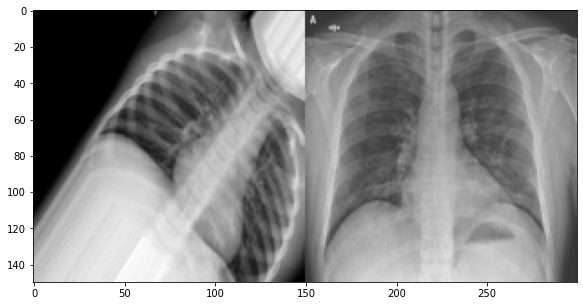

Normal Chest X-ray Vs Covid-19 Chest X-ray


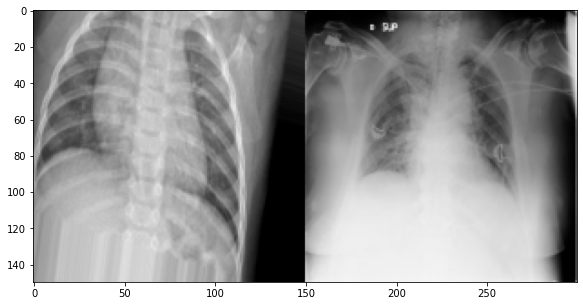

Normal Chest X-ray Vs Covid-19 Chest X-ray


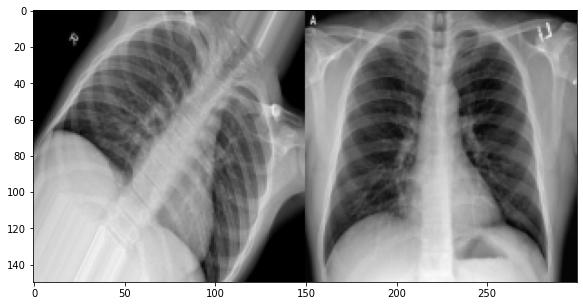

Normal Chest X-ray Vs Covid-19 Chest X-ray


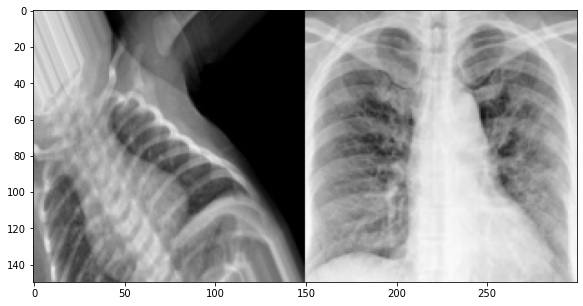

Normal Chest X-ray Vs Covid-19 Chest X-ray


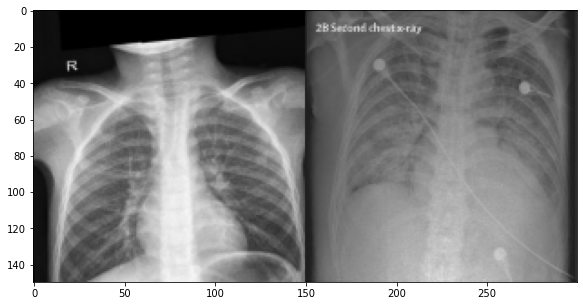

In [ ]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np
def plotter(i):
    normal = cv2.imread(Data_Dir_train+"normal/"+Nimages_train[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread(Data_Dir_train+"covid/"+Cimages_train[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

Normal Chest X-ray Vs Covid-19 Chest X-ray


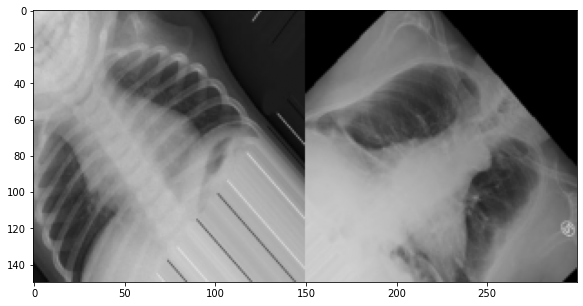

Normal Chest X-ray Vs Covid-19 Chest X-ray


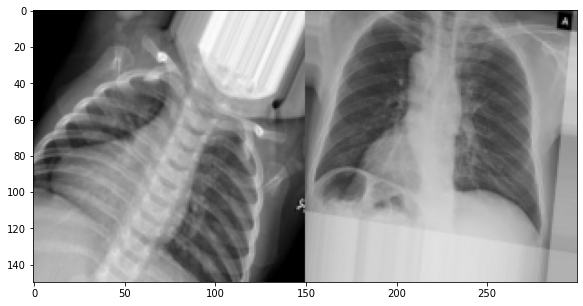

Normal Chest X-ray Vs Covid-19 Chest X-ray


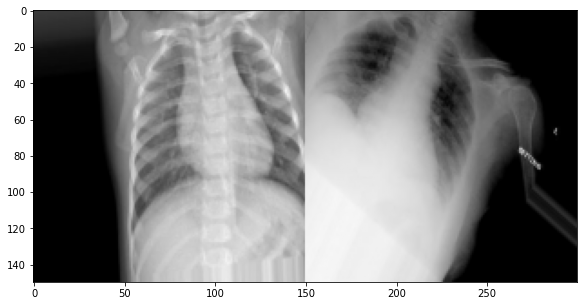

Normal Chest X-ray Vs Covid-19 Chest X-ray


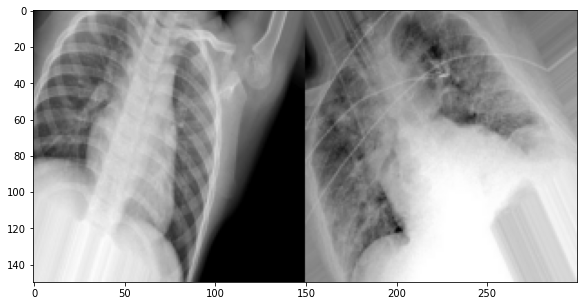

Normal Chest X-ray Vs Covid-19 Chest X-ray


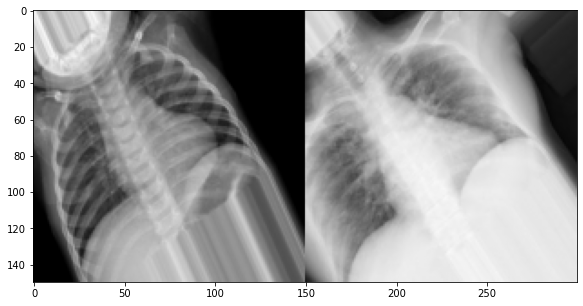

In [ ]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np
def plotter(i):
    normal = cv2.imread(Data_Dir_test+"normal/"+Nimages_test[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread(Data_Dir_test+"covid/"+Cimages_test[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()

for i in range(0,5):
    plotter(i)

In [ ]:

LB_train = LabelBinarizer()  #Initialize label binarizer
labels_train = LB_train.fit_transform(labels_train)
labels_train = to_categorical(labels_train); print(labels_train)

trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
(X_train, X_test, Y_train, Y_test) = train_test_split(data_train, labels_train, #data_train contains the preprocessed images and labels_train contains the categorical class
    test_size=0.20, stratify=labels_train, random_state=42)

In [ ]:
(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

((850, 224, 224, 3), (213, 224, 224, 3), (850, 2), (213, 2))

In [ ]:

LB_test = LabelBinarizer()  #Initialize label binarizer
labels_test = LB_test.fit_transform(labels_test)
labels_test = to_categorical(labels_test); print(labels_test)
# (X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,
#     test_size=0.20, stratify=labels, random_state=42)
testAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
from tensorflow.keras.applications import Xception

bModel = Xception(input_shape=(224, 224, 3), weights='imagenet', include_top=False) #base model
hModel = bModel.output #head_Model
hModel = AveragePooling2D(pool_size=(4, 4))(hModel)  #Downsamples the input along its spatial dimensions (height and width)
hModel = Flatten(name="flatten")(hModel)              #Flattening is converting the data into a 1-dimensional array for inputting it to the next layer.
hModel = Dense(64, activation="relu")(hModel)         #64 unit of layers with relu activation function-output the input directly if it is positive
hModel = Dropout(0.5)(hModel)                         #prevent from overfitting
hModel = Dense(2, activation="softmax")(hModel)       #binary-2 outputs(class)
model = Model(inputs=bModel.input, outputs=hModel)
for layer in bModel.layers:
    layer.trainable = False                           #no training in bmodel,train only hmodel layers

83689472/83683744 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


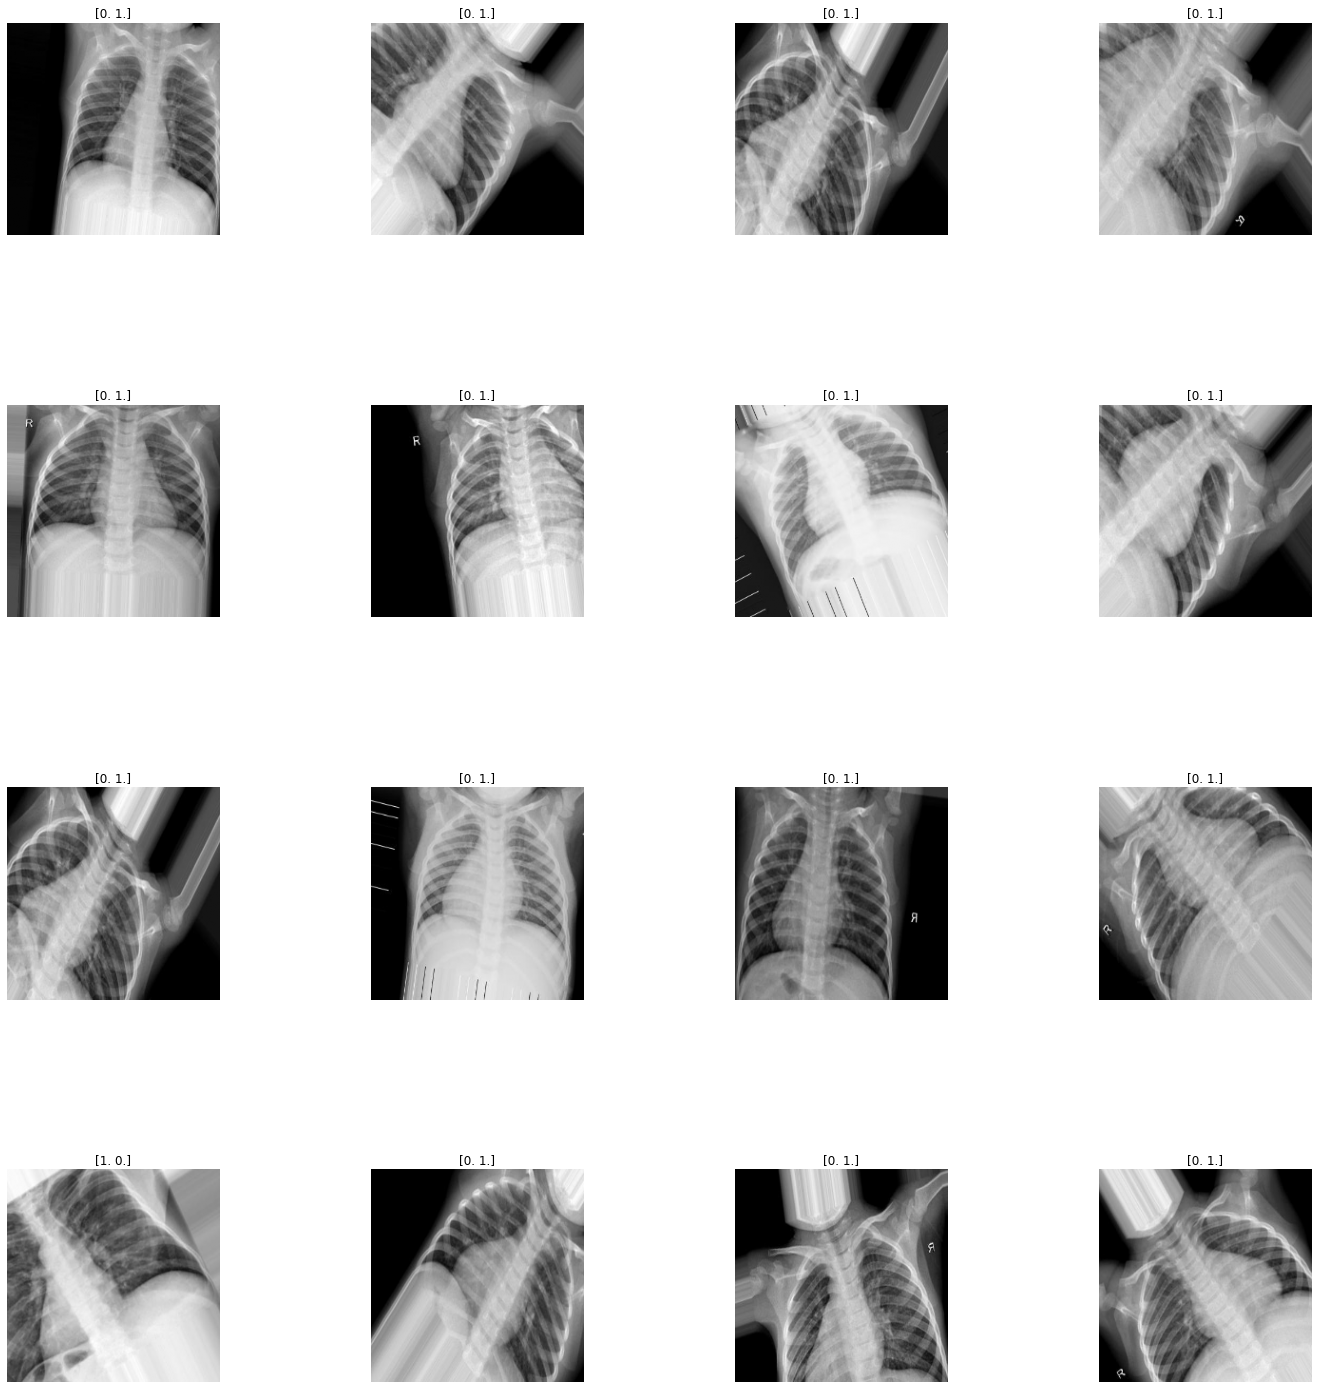

In [ ]:
W_grid = 4 #width
L_grid = 4 #lenth
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) #subplots
axes = axes.ravel()
n_training = len(data_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(data_train[index])
    axes[i].set_title(labels_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.8)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


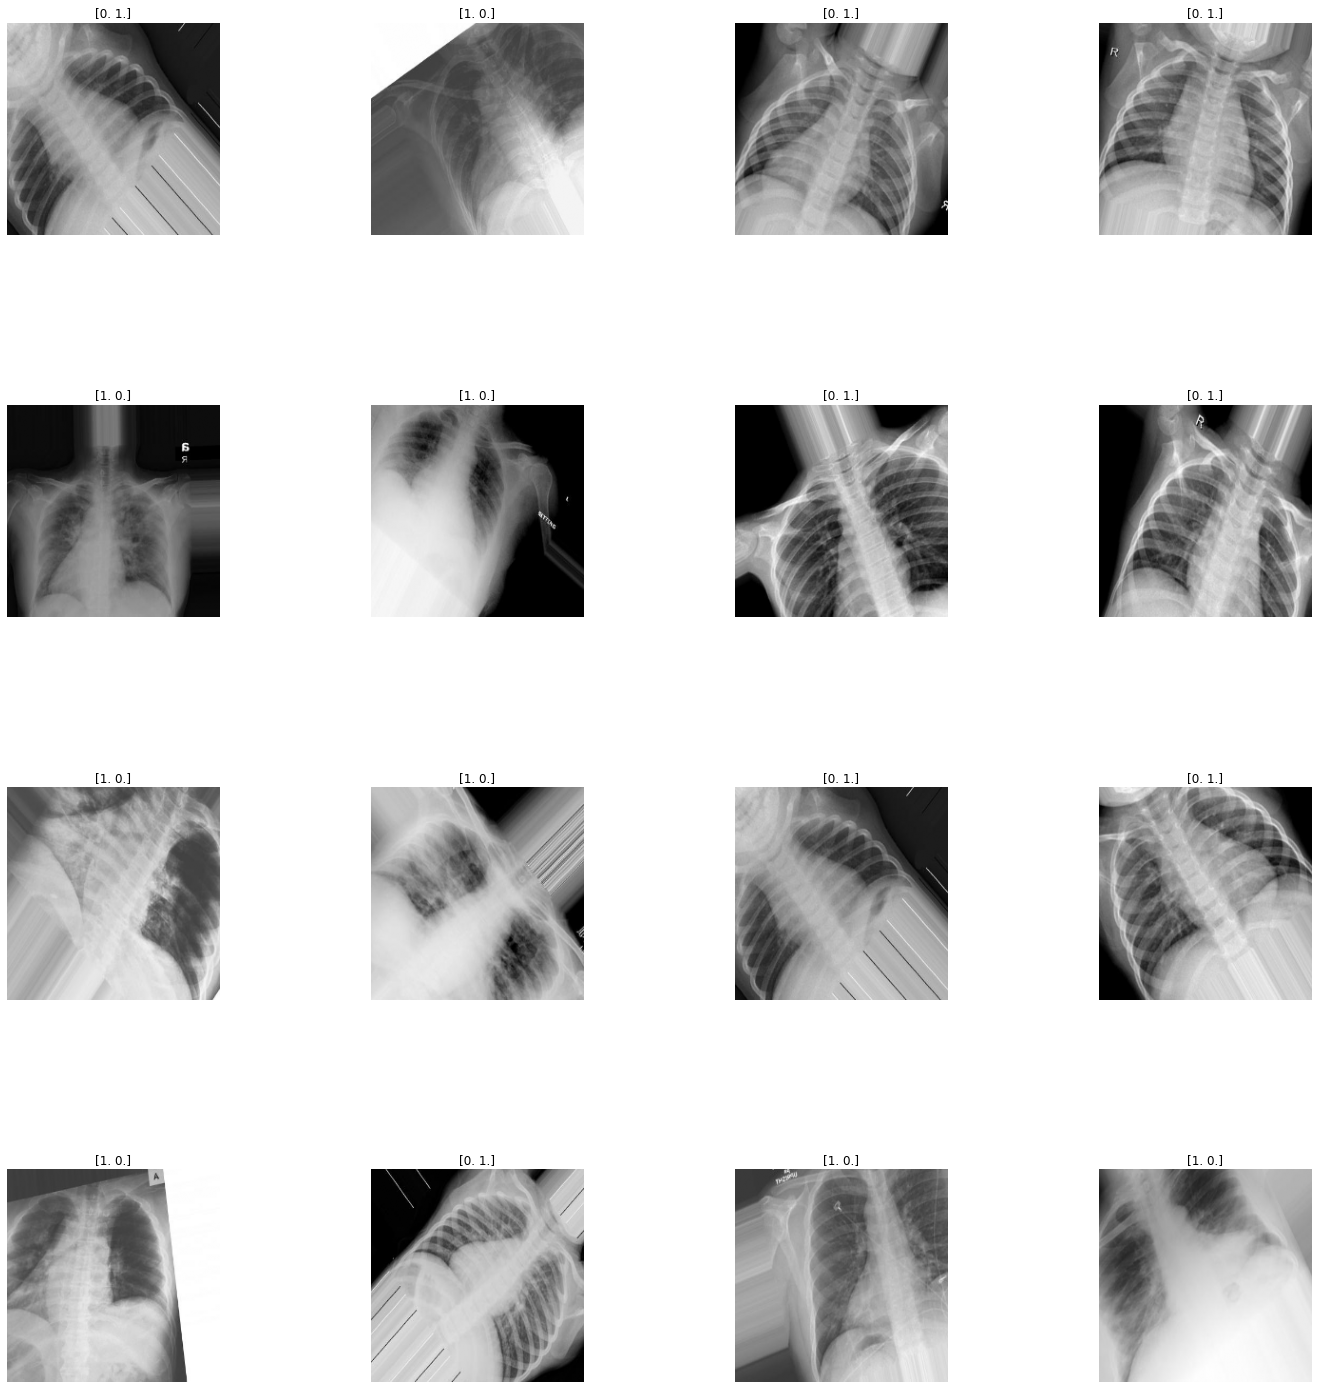

In [ ]:
W_grid = 4 #width
L_grid = 4 #lenth
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) #subplots
axes = axes.ravel()
n_training = len(data_test)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(data_test[index])
    axes[i].set_title(labels_test[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.8)

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)  #network weights iterative based in training data.--per paramater LR instead of classical stochastic gradient
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"]) #binary class
print("Compiling Starts") 
R = model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),  #new images will be form...not statis images as real world
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS)

Compiling Starts


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
32/32 [==============================] - 48s 394ms/step - loss: 0.4353 - accuracy: 0.7773 - val_loss: 0.1905 - val_accuracy: 0.9531
Epoch 2/10
32/32 [==============================] - 9s 296ms/step - loss: 0.1991 - accuracy: 0.9428 - val_loss: 0.1396 - val_accuracy: 0.9531
Epoch 3/10
32/32 [==============================] - 10s 298ms/step - loss: 0.1336 - accuracy: 0.9666 - val_loss: 0.1106 - val_accuracy: 0.9624
Epoch 4/10
32/32 [==============================] - 10s 299ms/step - loss: 0.1206 - accuracy: 0.9601 - val_loss: 0.0919 - val_accuracy: 0.9718
Epoch 5/10
32/32 [==============================] - 10s 298ms/step - loss: 0.1020 - accuracy: 0.9590 - val_loss: 0.0852 - val_accuracy: 0.9718
Epoch 6/10
32/32 [==============================] - 10s 300ms/step - loss: 0.0810 - accuracy: 0.9793 - val_loss: 0.0762 - val_accuracy: 0.9765
Epoch 7/10
32/32 [==============================] - 10s 302ms/step - loss: 0.0839 - accuracy: 0.9741 - val_loss: 0.0692 - val_accuracy: 0.9812


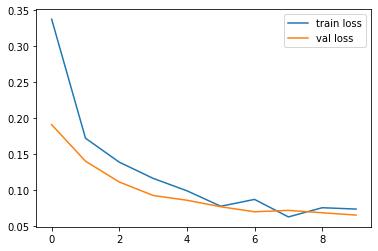

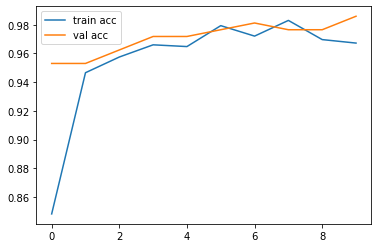

In [ ]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
model.save('Covid_model.h5')

['_26_7921371.jpeg', '_14_5521912.jpeg', '_25_9050216.jpeg', '_28_1560373.jpeg', '_23_7254315.jpeg', '_11_966186.jpeg', '_29_7124626.jpeg', '_10_5351531.jpeg', '_12_6510653.jpeg', '_2_7308252.jpeg', '_13_7038013.jpeg', '_27_3810954.jpeg', '_17_1949898.jpeg', '_20_102961.jpeg', '_7_5253164.jpeg', '_18_9161643.jpeg', '_21_9445097.jpeg', '_22_4332598.jpeg', '_8_5127752.jpeg', '_15_2463420.jpeg', '_3_2292341.jpeg', '_6_5598192.jpeg', '_24_6540600.jpeg', '_19_8534651.jpeg', '_16_1485109.jpeg', '_5_1196012.jpeg', '_4_6462076.jpeg', '_1_3452686.jpeg', '_0_1465610.jpeg', '_9_8664796.jpeg']
Prediction: Corona
Prediction: Corona
Prediction: Normal
Prediction: Corona
Prediction: Corona
Prediction: Normal
Prediction: Normal
Prediction: Corona
Prediction: Corona
Prediction: Corona
Prediction: Corona
Prediction: Corona
Prediction: Corona
Prediction: Normal
Prediction: Corona
Prediction: Normal
Prediction: Corona
Prediction: Corona
Prediction: Corona
Prediction: Corona
Prediction: Normal
Prediction: 

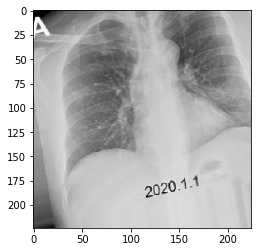

In [ ]:
import tensorflow as tf 
from keras.preprocessing import image
#from keras.models import load_model
model = tf.keras.models.load_model('Covid_model.h5')
from keras.applications.vgg16 import preprocess_input

#Cimages_check = os.listdir('/content/grive/MyDrive/Colab Notebooks/Project COVID/test/covid')
Cimages_check = os.listdir('/content/grive/MyDrive/Project COVID/test/covid')
print(Cimages_check)
# normal = cv2.imread(Data_Dir+"normal/"+Nimages[i])
for i in range(30):
   img = image.load_img('/content/grive/MyDrive/Project COVID/test/covid/'+Cimages_check[i], target_size=(224, 224)) #insert a random covid-19 x-ray image
   imgplot = plt.imshow(img)
   x = image.img_to_array(img)
   x = np.expand_dims(x, axis=0)   #Expand the shape of an array
   img_data = preprocess_input(x) #RGB to BGR, then each color channel is zero-centered with respect to the ImageNet dataset, without scaling.
   classes = model.predict(img_data)
   New_pred = np.argmax(classes, axis=1)   #max probability
   if New_pred==[1]:
     print('Prediction: Normal')
   else:
     print('Prediction: Corona')

In [ ]:
from keras.applications.xception import preprocess_input

['_26_7921371.jpeg', '_14_5521912.jpeg', '_25_9050216.jpeg', '_28_1560373.jpeg', '_23_7254315.jpeg', '_11_966186.jpeg', '_29_7124626.jpeg', '_10_5351531.jpeg', '_12_6510653.jpeg', '_2_7308252.jpeg', '_13_7038013.jpeg', '_27_3810954.jpeg', '_17_1949898.jpeg', '_20_102961.jpeg', '_7_5253164.jpeg', '_18_9161643.jpeg', '_21_9445097.jpeg', '_22_4332598.jpeg', '_8_5127752.jpeg', '_15_2463420.jpeg', '_3_2292341.jpeg', '_6_5598192.jpeg', '_24_6540600.jpeg', '_19_8534651.jpeg', '_16_1485109.jpeg', '_5_1196012.jpeg', '_4_6462076.jpeg', '_1_3452686.jpeg', '_0_1465610.jpeg', '_9_8664796.jpeg']
Prediction: Corona
Prediction: Normal
Prediction: Normal
Prediction: Corona
Prediction: Normal
Prediction: Normal
Prediction: Corona
Prediction: Corona
Prediction: Normal
Prediction: Corona
Prediction: Normal
Prediction: Normal
Prediction: Normal
Prediction: Corona
Prediction: Normal
Prediction: Normal
Prediction: Corona
Prediction: Normal
Prediction: Corona
Prediction: Normal
Prediction: Normal
Prediction: 

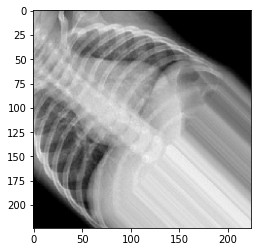

In [ ]:
Nimages_check = os.listdir('/content/grive/MyDrive/Project COVID/test/normal')
print(Cimages_check)
# normal = cv2.imread(Data_Dir+"normal/"+Nimages[i])
for i in range(30):
   img = image.load_img('/content/grive/MyDrive/Project COVID/test/normal/'+Nimages_check[i], target_size=(224, 224)) #insert a random covid-19 x-ray image
   imgplot = plt.imshow(img)
   x = image.img_to_array(img)
   x = np.expand_dims(x, axis=0)   #Expand the shape of an array
   img_data = preprocess_input(x)   #RGB to BGR, then each color channel is zero-centered with respect to the ImageNet dataset, without scaling.
   classes = model.predict(img_data)
   New_pred = np.argmax(classes, axis=1)  #max probability
   if New_pred==[1]:
     print('Prediction: Normal')
   else:
     print('Prediction: Corona')

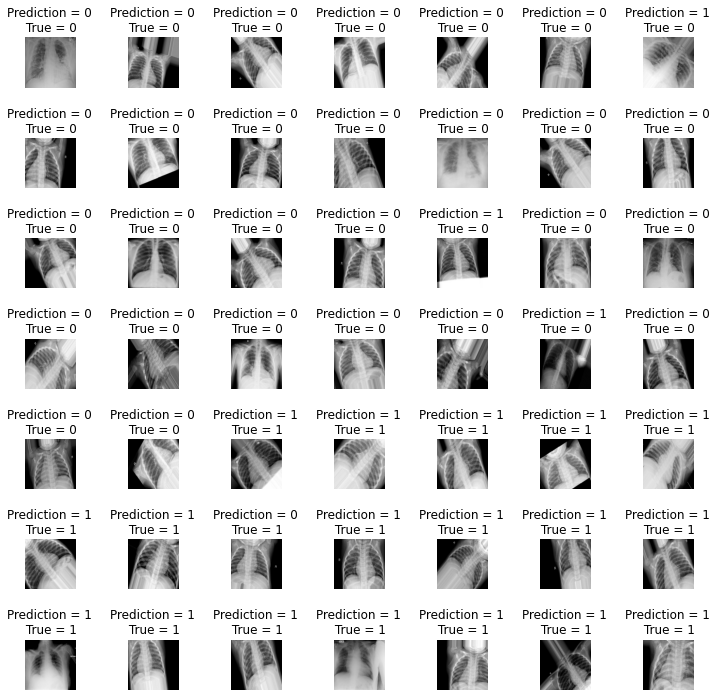

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(data_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], labels_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(data_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(labels_test.argmax(axis=1), y_pred,target_names=LB_test.classes_))

              precision    recall  f1-score   support

       covid       0.96      0.90      0.93        30
      normal       0.95      0.98      0.96        53

    accuracy                           0.95        83
   macro avg       0.95      0.94      0.95        83
weighted avg       0.95      0.95      0.95        83



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(labels_test.argmax(axis=1),y_pred)

0.9518072289156626